In [1]:
""" Import libraries """
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import numpy as np
from sklearn.neighbors import NearestNeighbors
from scipy.spatial.distance import correlation
from sklearn.metrics.pairwise import pairwise_distances
import ipywidgets as widgets
from IPython.display import display, clear_output
from contextlib import contextmanager
import warnings
warnings.filterwarnings('ignore')
import os, sys
import re
import seaborn as sns

In [2]:
books_df = pd.read_csv("/Users/alexandermartinez/Downloads/book-recommend-data/Books.csv", encoding = "ISO-8859-1")
events_df = pd.read_csv("/Users/alexandermartinez/Downloads/book-recommend-data/UserEvents.csv", encoding = "ISO-8859-1")
users_df = pd.read_csv("/Users/alexandermartinez/Downloads/book-recommend-data/Users.csv", encoding = "ISO-8859-1")

In [3]:
""" Let's take a look at the Users dataset """
print(users_df.shape)
users_df.head()

(100000, 4)


,Unnamed: 0,user,location,age
0,177121,177122.0,"winter park, florida, usa",50.0
1,174021,174022.0,"fairview park, ohio, usa",NaN
2,179441,179442.0,"farmville, north carolina, usa",45.0
3,44391,44392.0,"weston, florida, usa",65.0
4,89250,89251.0,"duesseldorf, n/a, germany",NaN


In [4]:
""" We'll check the date type of the Users dataset"""
users_df.dtypes

Unnamed: 0      int64
user          float64
location       object
age           float64
dtype: object

In [5]:
""" Taking a closer look at the user values"""
users_df.user.values

array([177122., 174022., 179442., ..., 251243.,  81081.,  63103.])

In [6]:
""" We can observe that 'Unnamed: 0' is the int version of users, so we can use it to replace the missing values """
users_df.loc[users_df.user.isnull(),:]

,Unnamed: 0,user,location,age
34,195395,NaN,"burke, virginia, usa",NaN
66,265734,NaN,"pittsburgh, pennsylvania, usa",46.0
117,37834,NaN,"dunbarton, new hampshire, usa",219.0
131,201161,NaN,"saskatoon, saskatchewan, canada",46.0
164,228058,NaN,"lleida, lleida, spain",31.0
171,199357,NaN,"houston, texas, usa",21.0
298,140749,NaN,"sacramento, california, usa",39.0
310,24819,NaN,"madrid, madrid, spain",29.0
324,61169,NaN,"w.stockbridge, massachusetts, usa",NaN
376,4398,NaN,"vigo, pontevedra, spain",32.0


In [7]:
users_df.user = users_df.loc[:]['Unnamed: 0']
print(sorted(users_df.user.unique()))

[3, 6, 21, 23, 25, 26, 27, 28, 32, 36, 40, 41, 43, 53, 54, 60, 63, 65, 67, 73, 78, 84, 86, 87, 88, 89, 91, 95, 96, 97, 99, 102, 104, 108, 114, 115, 116, 117, 124, 125, 127, 130, 131, 133, 135, 137, 138, 140, 141, 143, 146, 149, 150, 151, 152, 153, 155, 159, 166, 171, 172, 180, 182, 183, 188, 191, 192, 193, 200, 203, 204, 208, 210, 212, 214, 215, 217, 220, 221, 223, 224, 226, 229, 230, 232, 235, 236, 238, 239, 242, 244, 246, 247, 255, 256, 260, 263, 264, 267, 269, 271, 273, 274, 275, 277, 279, 283, 284, 285, 290, 291, 297, 299, 301, 305, 306, 307, 309, 311, 319, 322, 323, 324, 325, 331, 332, 338, 342, 343, 344, 347, 350, 353, 354, 356, 357, 359, 364, 365, 368, 369, 375, 377, 379, 386, 387, 391, 396, 397, 400, 402, 407, 410, 418, 419, 423, 428, 432, 433, 435, 441, 442, 444, 446, 447, 450, 452, 455, 456, 459, 460, 463, 469, 470, 471, 476, 482, 483, 487, 489, 491, 493, 495, 497, 498, 499, 500, 501, 504, 505, 507, 510, 511, 513, 516, 517, 520, 523, 535, 537, 540, 542, 546, 548, 551, 553, 55

In [8]:
""" We won't be able to use location due to missing values """
users_df.loc[users_df.location.isnull(),:]

,Unnamed: 0,user,location,age
20,130220,130220,NaN,49.0
91,236192,236192,NaN,38.0
264,75329,75329,NaN,21.0
314,42699,42699,NaN,60.0
375,47627,47627,NaN,30.0
472,203340,203340,NaN,30.0
609,153901,153901,NaN,40.0
688,259007,259007,NaN,NaN
698,170334,170334,NaN,NaN
701,223337,223337,NaN,31.0


In [9]:
""" Take a closer look at the Unnamed: 0 values"""
users_df.iloc[:,1].values

array([177121, 174021, 179441, ..., 251242,  81080,  63102])

In [10]:
print(sorted(users_df.age.unique()))

[1.0, 50.0, nan, 0.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 90.0, 91.0, 92.0, 93.0, 94.0, 96.0, 97.0, 99.0, 100.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 111.0, 113.0, 114.0, 116.0, 118.0, 123.0, 124.0, 141.0, 143.0, 147.0, 148.0, 151.0, 152.0, 162.0, 189.0, 200.0, 204.0, 208.0, 209.0, 210.0, 219.0, 230.0]


In [11]:
""" 
Need to replace NaN values in the age column. We will replace them with the mean age. 
- We'll assume the ages less than 10 refer to books being bought for someone under 10.
- However we can discard the ages above 120 though given current population numbers.
- Since we only have whole numbers, we can cast to integers for simplicity.
"""
users_df.loc[(users_df.age > 120), 'age'] = np.nan
users_df.age = users_df.age.fillna(users_df.age.mean())
users_df.age = users_df.age.astype(np.int32)

In [12]:
print(sorted(users_df.age.unique()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 90, 91, 92, 93, 94, 96, 97, 99, 100, 102, 103, 104, 105, 106, 107, 108, 111, 113, 114, 116, 118]


In [13]:
""" Let's take a look at the books dataset"""
books_df.head()

,Unnamed: 0,bookISBN,bookName,author,yearOfPublication,publisher,urlId
0,58005,0773730982,"Stretch, Swallow &amp; Stare",Veronika Martenova Charles,1999,Stoddart Kids,8040.0
1,158211,0916620867,The Two Faces of Religion: A Psychiatrists View,N.S. Xavier,1987,Portals Pr,46584.0
2,127812,0380978598,Roma Eterna,Robert Silverberg,2003,Eos,39681.0
3,47598,0802727719,For Everything a Season: Simple Musings on Liv...,Philip Gulley,2001,Walker Large Print,29478.0
4,131723,0446604178,"Mountain, Get Out of My Way: Life Lessons and ...",Montel Williams,1997,Warner Books (Mm),104573.0


In [14]:
""" We remove the unnecessary columns from the books dataset"""
books_df.drop(['Unnamed: 0', 'urlId'], axis=1, inplace=True)

In [15]:
books_df.head()

,bookISBN,bookName,author,yearOfPublication,publisher
0,0773730982,"Stretch, Swallow &amp; Stare",Veronika Martenova Charles,1999,Stoddart Kids
1,0916620867,The Two Faces of Religion: A Psychiatrists View,N.S. Xavier,1987,Portals Pr
2,0380978598,Roma Eterna,Robert Silverberg,2003,Eos
3,0802727719,For Everything a Season: Simple Musings on Liv...,Philip Gulley,2001,Walker Large Print
4,0446604178,"Mountain, Get Out of My Way: Life Lessons and ...",Montel Williams,1997,Warner Books (Mm)


In [16]:
""" Let's inspect the data types for each of the columns in the book dataset """
books_df.dtypes

bookISBN             object
bookName             object
author               object
yearOfPublication    object
publisher            object
dtype: object

In [17]:
""" Adjust the column width to display the full text within columns """
pd.set_option('display.max_colwidth', -1)

In [18]:
""" Let's take a look at the unique values for the yearOfPublication """
books_df.yearOfPublication.unique()

array(['1999', '1987', '2003', '2001', '1997', '1994', '1998', '1976',
       '1986', '2004', '1978', '1995', '2002', '1983', '1981', '1992',
       '2000', '1984', '1993', '1996', '1991', '1985', '1982', '1990',
       '0', '1975', '1965', '1989', '1988', '1980', '1977', '1973',
       '1979', '1968', '1972', '1969', '1970', '1974', '1955', '1959',
       '1964', '1967', '1962', '1957', '1963', '1966', '1960', '2005',
       '1954', '1961', '1951', '1971', '1958', '1956', '1920', '1948',
       '1901', '2021', '1929', '1953', '1940', '1923', '1930', '1942',
       '1952', '1900', '2006', '1950', '1947', '1926', '1944', '1376',
       '1931', '1941', '2038', '1921', '2030', '1925', '1937', '1946',
       '1949', '1911', '1939', '2011', '1933', '2008', '2050', '1910',
       '1922', '1934', '2010', '2024', '1919', '1936', '1927', '1938',
       '1943', '1928', '2012', '1932', '1945', 'DK Publishing Inc',
       '2020', '1917', '2037', '1914', '1906'], dtype=object)

In [19]:
""" 'DK Publishing Inc' has been incorrectly loaded in the wrong column """
books_df.loc[books_df.yearOfPublication == 'DK Publishing Inc',:]

,bookISBN,bookName,author,yearOfPublication,publisher
98597,078946697X,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\"";Michael Teitelbaum""",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg
132137,0789466953,"DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\"";James Buckley""",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.01.THUMBZZZ.jpg


In [20]:
""" Correct the necessary rows """
books_df.loc[books_df.bookISBN == '078946697X', 'yearOfPublication'] = 2000
books_df.loc[books_df.bookISBN == '078946697X', 'author'] = "Michael Teitelbaum"
books_df.loc[books_df.bookISBN == '078946697X', 'publisher'] = "DK Publishing Inc"
books_df.loc[books_df.bookISBN == '078946697X', 'bookName'] = "DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)"

In [21]:
books_df.loc[books_df.bookISBN == '0789466953', 'yearOfPublication'] = 2000
books_df.loc[books_df.bookISBN == '0789466953', 'author'] = "James Buckley"
books_df.loc[books_df.bookISBN == '0789466953', 'publisher'] = "2000"
books_df.loc[books_df.bookISBN == '0789466953', 'bookName'] = "DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)"

In [22]:
""" Convert the years from strings to integers """
books_df.yearOfPublication=pd.to_numeric(books_df.yearOfPublication, errors='coerce')

In [23]:
print(sorted(books_df['yearOfPublication'].unique()))

[0, 1376, 1900, 1901, 1906, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021, 2024, 2030, 2037, 2038, 2050]


In [24]:
""" We will assume that 0 and years after 2018 are invalid """
books_df.loc[(books_df.yearOfPublication > 2018) | (books_df.yearOfPublication == 0), 'yearOfPublication'] = np.NAN
books_df.yearOfPublication.fillna(round(books_df.yearOfPublication.mean()), inplace=True)
books_df.yearOfPublication = books_df.yearOfPublication.astype(np.int32)

In [25]:
""" Now let's take a look at the publisher column """
books_df.publisher.unique()

array(['Stoddart Kids', 'Portals Pr', 'Eos', ...,
       'Teachers College Press', 'Umschau Verlag', 'White Oak Press'],
      dtype=object)

In [26]:
books_df.publisher.isnull().values.any()

True

In [27]:
""" Locate the NaN values """
books_df.loc[books_df.publisher.isnull(),:]

,bookISBN,bookName,author,yearOfPublication,publisher
54596,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN


In [28]:
""" Replace the NaN value with 'other' """
books_df.loc[(books_df.bookISBN == '1931696993'), 'publisher'] = 'other'

In [29]:
events_df.head()

,Unnamed: 0,user,bookId,impression
0,523113,126736,0843946806,dislike
1,861298,208406,0345353145,like
2,37104,8890,2020213508,add to cart
3,328497,78553,0451402383,add to cart
4,121368,27875,0307129659,add to cart


In [30]:
impressions = events_df.as_matrix(['user', 'bookId', 'impression'])

In [31]:
events_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 4 columns):
Unnamed: 0    400000 non-null int64
user          400000 non-null int64
bookId        400000 non-null object
impression    400000 non-null object
dtypes: int64(2), object(2)
memory usage: 12.2+ MB


In [32]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
Unnamed: 0    100000 non-null int64
user          100000 non-null int64
location      98037 non-null object
age           100000 non-null int32
dtypes: int32(1), int64(2), object(1)
memory usage: 2.7+ MB


In [33]:
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 5 columns):
bookISBN             150000 non-null object
bookName             150000 non-null object
author               145533 non-null object
yearOfPublication    150000 non-null int32
publisher            150000 non-null object
dtypes: int32(1), object(4)
memory usage: 5.1+ MB


In [34]:
""" Check structure of users dataframe without duplicates """
users_df.drop_duplicates().shape

(100000, 4)

In [35]:
""" Check structure of events dataframe without duplicates """
events_df.drop_duplicates().shape

(400000, 4)

In [36]:
""" Check structure of books dataframe without duplicates """
books_df.drop_duplicates().shape

(150000, 5)

In [37]:
"""Check the meaning of the 'Unnamed: 0' Column in each CSV file"""
users_df.sort_values(by=['Unnamed: 0']).head()

,Unnamed: 0,user,location,age
58774,3,3,"porto, v.n.gaia, portugal",17
91081,6,6,"washington, dc, usa",34
67811,21,21,"erfurt, thueringen, germany",34
33067,23,23,"cologne, nrw, germany",19
20885,25,25,"bellevue, washington, usa",34


In [38]:
events_df.sort_values(by=['Unnamed: 0']).head()

,Unnamed: 0,user,bookId,impression
255342,1,276726,0155061224,view
215248,3,276729,052165615X,dislike
395619,4,276729,0521795028,interact
291895,6,276736,3257224281,like
380300,7,276737,0600570967,interact


In [39]:
""" Take a look at the user column in the event dataframe """
events_df.sort_values(by=['user']).head()

,Unnamed: 0,user,bookId,impression
91065,9576,8,1552041778,view
379308,9571,8,074322678X,view
123851,9563,8,0002005018,view
244109,9579,8,1575663937,interact
356703,9578,8,1567407781,interact


In [40]:
""" Check size of events for it's shape """
events_df.shape

(400000, 4)

In [41]:
""" Check size of users and books dataframes for M x N matrix """
n_users = users_df.shape[0]
n_books = books_df.shape[0]
print(n_users * n_books)

15000000000


In [42]:
""" Events dateframe should have userId and bookId which exist in the respective dataframes """
events_new = events_df[events_df.bookId.isin(books_df.bookISBN)]
events_new = events_new[events_df.user.isin(users_df.user)]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [43]:
print(events_df.shape)
print(events_new.shape)

(400000, 4)
(71372, 4)


In [44]:
""" Check the sparsity of the dataset """
sparsity=1.0-len(events_new)/float(n_users*n_books)
print('The sparsity level of the Events dataset is ' + str(sparsity*100) + ' %')

The sparsity level of the Events dataset is 99.99952418666666 %


In [45]:
""" Check the values of the 'impression' column in the Events dataset """
events_df.impression.unique()

array(['dislike', 'like', 'add to cart', 'view', 'interact', 'checkout'],
      dtype=object)

In [46]:
events_df.columns.values

array(['Unnamed: 0', 'user', 'bookId', 'impression'], dtype=object)

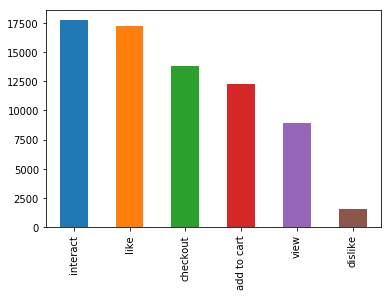

In [47]:
""" Let's create a barplot of impressions """
events_new.impression.value_counts().plot(kind="bar")
plt.show()

In [48]:
""" Let's look at the books based on popularity """
impression_count = pd.DataFrame(events_new.groupby(['bookId'])['impression'].sum())
top10 = impression_count.sort_values('impression', ascending = False).head(10)
print("The following books are recommended")
top10.merge(books_df, left_index = True, right_on='bookISBN')

The following books are recommended


,impression,bookISBN,bookName,author,yearOfPublication,publisher
139436,viewviewviewview,0446354678,Memories of Midnight,Sidney Sheldon,1991,Warner Books
76223,viewviewviewlikeinteractdislike,0802139868,The Sexual Life of Catherine M.,NaN,2003,Grove Press
17368,viewviewviewlikeadd to cart,0670839809,Waiting to Exhale,Terry McMillan,1992,Viking Books
141173,viewviewviewinteractinteract,0590483404,"A Shocker on Shock Street (Goosebumps, No 35)",R. L. Stine,1995,Scholastic
74539,viewviewviewinteract,0380015390,Satanic Bible,Anton Szandor Lavey,1976,Avon
86027,viewviewviewdislikelike,0671695142,Twilight's Child (Cutler),V.C. Andrews,1992,Pocket
28784,viewviewviewadd to cartadd to cart,0440224071,Los Alamos: A Novel,Joseph Kanon,1998,Island
38637,viewviewviewadd to cart,0385304900,Jewels,Danielle Steel,1992,Delacorte Press
83401,viewviewview,038531437X,The Wedding,Danielle Steel,2000,Delacorte Press
32558,viewviewview,0440146577,Loving,Danielle Steel,1981,Dell


In [49]:
events_new.impression.astype(object).fillna("impression")

4         add to cart
6         interact   
7         interact   
11        interact   
17        add to cart
28        add to cart
30        like       
56        like       
60        checkout   
61        view       
65        interact   
76        interact   
83        checkout   
88        interact   
89        interact   
94        like       
96        interact   
97        checkout   
98        like       
104       checkout   
105       interact   
110       checkout   
111       checkout   
117       add to cart
119       add to cart
121       checkout   
139       checkout   
140       view       
143       add to cart
144       like       
          ...        
399836    add to cart
399841    interact   
399846    interact   
399852    like       
399857    interact   
399864    interact   
399873    interact   
399879    like       
399884    view       
399886    interact   
399887    like       
399895    interact   
399903    like       
399909    checkout   
399926    

In [50]:
""" Convert impression strings to integers, we start at 1 so we can label null values 0 """
mapping = {'dislike': 1, 'like': 2, 'add to cart': 3, 'view': 4, 'interact': 5, 'checkout': 6}
impressions = events_new.replace({'impression': mapping})

In [51]:
impressions.head(5)

,Unnamed: 0,user,bookId,impression
4,121368,27875,0307129659,3
6,103692,23902,0006156487,5
7,11652,850,3426616262,5
11,453827,108786,0515134384,5
17,146436,32773,0440217563,3


In [52]:
""" Create a user x bookId matrix """
impressions_matrix = impressions.pivot(index='user', columns='bookId', values='impression')
user = impressions_matrix.index
bookId = impressions_matrix.columns
print(impressions_matrix.shape)
impressions_matrix.head()

(16446, 38823)


bookId,0001046438,0001047973,000104799X,0001837397,0001952803,0002005018,0002116286,0002154900,0002163578,0002163713,...,9999999999,B00001U0CP,B00005N5J6,B00005TZWI,B00005UMK6,B0000633PU,B00006H3BO,B00007FYKW,B0000E63CJ,B0001FZGPI
user,,,,,,,,,,,,,,,,,,,,,
32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
""" Fill the NaN values with 'none' """
impressions_matrix = impressions_matrix.astype(object).fillna(0)

In [65]:
impressions_matrix = impressions_matrix.astype(np.int32)

In [97]:
""" Create global variables"""
global k, metric
k = 10
metric = 'cosine'

In [98]:
def find_k_users(user, impressions_matrix, metric = metric, k = k):
    """
    Finds k similar users
    :param: user: userId
    impressions_matrix: impressions matrix (rows = users, columns = bookIds)
    k: number of users to look for

    :return similarities and and indices of k similar users
    """
    similarities = []
    indices = []
    model_knn = NearestNeighbors(metric=metric, algorithm='brute')
    model_knn.fit(impressions_matrix)

    distances, indices = model_knn.kneighbors(impressions_matrix.iloc[user-1,:].values.reshape(1, -1), n_neighbors=k+1)
    similarities = 1-distances.flatten()
    print('{0} most similar users for User {1}:\n'.format(k, user))
    for i in range(0, len(indices.flatten())):
        if indices.flatten()[i]+1 == user:
            continue
        else:
            print('{0}: User {1}, with similarity of {2}'.format(i, indices.flatten()[i] + 1, similarities.flatten()[i]))

    return similarities, indices

In [108]:
def find_k_items(bookId, impressions_matrix, metric=metric, k=k):
    """
    Finds k similar books
    :param: bookId: bookId
    impressions_matrix: impressions matrix (rows = users, columns = bookIds)
    k: number of books to look for

    :return similarities and and indices of k similar items
    """
    similarities = []
    indices = []
    impressions_matrix = impressions_matrix.T
    loc = impressions_matrix.index.get_loc(bookId)
    model_knn = NearestNeighbors(metric=metric, algorithm='brute')
    model_knn.fit(impressions_matrix)

    distances, indices = model_knn.kneighbors(impressions_matrix.iloc[loc, :].values.reshape(1, -1), n_neighbors= k+1)
    similarities = 1-distances.flatten()

    return similarities, indices

In [100]:
def predict_user_based(user, bookId, impressions_matrix, metric=metric, k=k):
    """
    Predict impression for specified user-item combination based on user-based approach

    """
    prediction = 0
    user_loc = impressions_matrix.index.get_loc(user)
    item_loc = impressions_matrix.columns.get_loc(bookId)
    similarities, indices = find_k_users(user, impressions_matrix, metric, k)
    mean_impression = impressions_matrix.iloc[user_loc,:].mean()
    sum_wt = np.sum(similarities)-1
    product = 1
    wtd_sum = 0

    for i in range(0, len(indices.flatten())):
        if indices.flatten()[i]+1 == user:
            continue
        else:
            impressions_diff = impressions_matrix.iloc[indices.flatten()[i], item_loc]-np.mean(impressions_matrix.iloc[indices.flatten()[i],:])
            product = impressions_diff * similarities[i]
            wtd_sum = wtd_sum + product

    prediction = int(round(mean_impression + (wtd_sum/sum_wt)))

    if prediction < 0:
        prediction = 0
    elif prediction > 6:
        prediction = 6


    print('\nPredicted rating for user {0} -> item {1}: {2}'.format(user, bookId, prediction))

    return prediction

In [113]:
def predict_item_based(user, bookId, impressions_matrix, metric=metric, k=k):
    """
    Predict impression for specified user-item combination based on item-based approach

    """
    prediction= wtd_sum = 0
    user_loc = impressions_matrix.index.get_loc(user)
    item_loc = impressions_matrix.columns.get_loc(bookId)
    similarities, indices = find_k_items(bookId, impressions_matrix)
    sum_wt = np.sum(similarities)-1
    product = 1

    for i in range(0, len(indices.flatten())):
        if indices.flatten()[i] == item_loc:
            continue;
        else:
            product = impressions_matrix.iloc[user_loc,indices.flatten()[i]]*(similarities[i])
            wtd_sum = wtd_sum + product
    
    prediction = int(round(wtd_sum/sum_wt))

    if prediction < 0:
        prediction = 0
    elif prediction > 6:
        prediction = 6

    print('\nPredicted rating for user {0} -> item {1}: {2}'.format(user, bookId, prediction))

    return prediction

In [123]:
similarities,indices=find_k_items('0001046438',impressions_matrix)

In [124]:
print(similarities, indices)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] [[19247 24742 24739 21647 24741  5437 12188  6062 11961 14916 22567]]


In [126]:
prediction = predict_item_based(32,'0001046438',impressions_matrix)


Predicted rating for user 32 -> item 0001046438: 0


In [122]:
@contextmanager
def suppress_stdout():
    with open(os.devnull, "w") as devnull:
        old_stdout = sys.stdout
        sys.stdout = devnull
        try:
            yield
        finally:
            sys.stdout = old_stdout

In [117]:
def recommend_item(user, impressions_matrix, metric=metric):
    if(user not in impressions_matrix.index.values) or type(user) is not int:
        print("User should be a valid integer from this list :\n\n {}" .format(re.sub('[\[\]]', '',
                                                                                      np.array_str(impressions_matrix.index.values))))
    else:
        ids = ['Item-based (correlation)','Item-based (cosine)','User-based (correlation)','User-based (cosine)']
        select = widgets.Dropdown(options=ids, value=ids[0],description='Select approach', width='1000px')
        def on_change(change):
            # clear_output(wait=True)
            prediction = []
            if change['type'] == 'change' and change['name'] == 'value':
                if (select.value == 'Item-based (correlation)') | (select.value == 'User-based (correlation)'):
                    metric = 'correlation'
                else:
                    metric = 'cosine'
                with suppress_stdout():
                    if (select.value == 'Item-based (correlation)') | (select.value == 'Item-based (cosine)'):
                        for i in range(impressions_matrix.shape[1]):
                            if (impressions_matrix[str(impressions_matrix.columns[i])][user] != 0):  # not rated already
                                prediction.append(predict_item_based(user, impressions_matrix.columns[i], impressions_matrix, metric))
                            else:
                                prediction.append(-1)  # for already rated items
                    else:
                        for i in range(impressions_matrix.shape[1]):
                            if (impressions_matrix[str(impressions_matrix.columns[i])][user] != 0):  # not rated already
                                prediction.append(predict_user_based(user, str(impressions_matrix.columns[i]), impressions_matrix, metric))
                            else:
                                prediction.append(-1)  # for already rated items
                prediction = pd.Series(prediction)
                prediction = prediction.sort_values(ascending=False)
                recommended = prediction[:10]
                print("As per {0} approach....Following books are recommended...".format(select.value))
                for i in range(len(recommended)):
                    print("{0}. {1}".format(i + 1,books_df.bookName[recommended.index[i]]))

        select.observe(on_change)
        display(select)

In [94]:
""" User-based correlation """
recommend_item(67, impressions_matrix)

Dropdown(description='Select approach', options=('Item-based (correlation)', 'Item-based (cosine)', 'User-base…

As per User-based (correlation) approach....Following books are recommended...
1. The Baker's Boy (Book of Words)
2. MIND PREY
3. Basics of Radio Control Sailplanes
4. Wordperfect 5.1 Instant Reference (Sybex Prompter Series)
5. They Say (Eerie, Indiana, No 12)
6. The Elusive Messiah: A Philosophical Overview of the Quest for the Historical Jesus
7. The Seizing of Yankee Green Mall: A Novel
8. Cows Of Our Planet (Far Side Series)
9. Flaubert's Parrot (Vintage International)
10. Vietnam Spook Show


In [127]:
""" Item-based cosine """
recommend_item(32, impressions_matrix)

Dropdown(description='Select approach', options=('Item-based (correlation)', 'Item-based (cosine)', 'User-base…

As per Item-based (cosine) approach....Following books are recommended...
1. How to Drive Your Family CrazyÂ¹ on Halloween
2. The Ideal Bride (Laurens, Stephanie)
3. Out of the Madhouse  (Buffy the Vampire Slayer: The Gatekeeper Trilogy, Book 1)
4. They Say (Eerie, Indiana, No 12)
5. The Elusive Messiah: A Philosophical Overview of the Quest for the Historical Jesus
6. The Seizing of Yankee Green Mall: A Novel
7. Cows Of Our Planet (Far Side Series)
8. Flaubert's Parrot (Vintage International)
9. Vietnam Spook Show
10. Guest Shot


In [129]:
""" Save matrix to CSV file """
impressions_matrix.to_csv('impressions_matrix.csv')